In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from openmc.deplete import ResultsList, Results
import openmc
import os
import json

In [2]:
res_path = 'results/depletion/v5'

In [4]:
json.load(open(os.path.join(res_path,os.listdir(res_path)[0],'results.json')))

{'materials': {'fuel_enr': 3.0,
  'fuel_density': 10,
  'coolant_density': 0.5,
  'cladding_density': 3.0},
 'geometry': {'tvel_r': 0.7, 'tvel_dist': 1.0, 'cladding_thick': 0.2},
 'power': 1000,
 'config_id': '0',
 'experiment_number': 0,
 'start_time': '2025-04-11_21:21:24',
 'dir': 'results/depletion/v5/0',
 'finish_time': '2025-04-12_10:03:10'}

In [6]:
results =Results(os.path.join(res_path,os.listdir(res_path)[0],'depletion_results.h5'))
results[:5]

[<StepResult: t=0.0, dt=21600.0, source=1000.0>,
 <StepResult: t=21600.0, dt=21600.0, source=1000.0>,
 <StepResult: t=43200.0, dt=21600.0, source=1000.0>,
 <StepResult: t=64800.0, dt=21600.0, source=1000.0>,
 <StepResult: t=86400.0, dt=21600.0, source=1000.0>]

In [7]:
atoms1 = (results.get_atoms('2','U238')[1])
atoms2 = (results.get_atoms('2','U235')[1])
atoms1 /= atoms1[0]
atoms2 /= atoms2[0]
times = results.get_times()
keff = results.get_keff()[1][:,0]
heat = results.get_decay_heat('2')[0]
keff, heat

(array([1.23427203, 1.24480618, 1.23829502, ..., 1.23376183, 1.23524775,
        1.22217133], shape=(1201,)),
 array([0.00000e+00, 2.16000e+04, 4.32000e+04, ..., 2.58768e+07,
        2.58984e+07, 2.59200e+07], shape=(1201,)))

In [8]:
atoms1[-1], atoms2[-1]

(np.float64(0.9998909195003535), np.float64(0.9964714901828486))

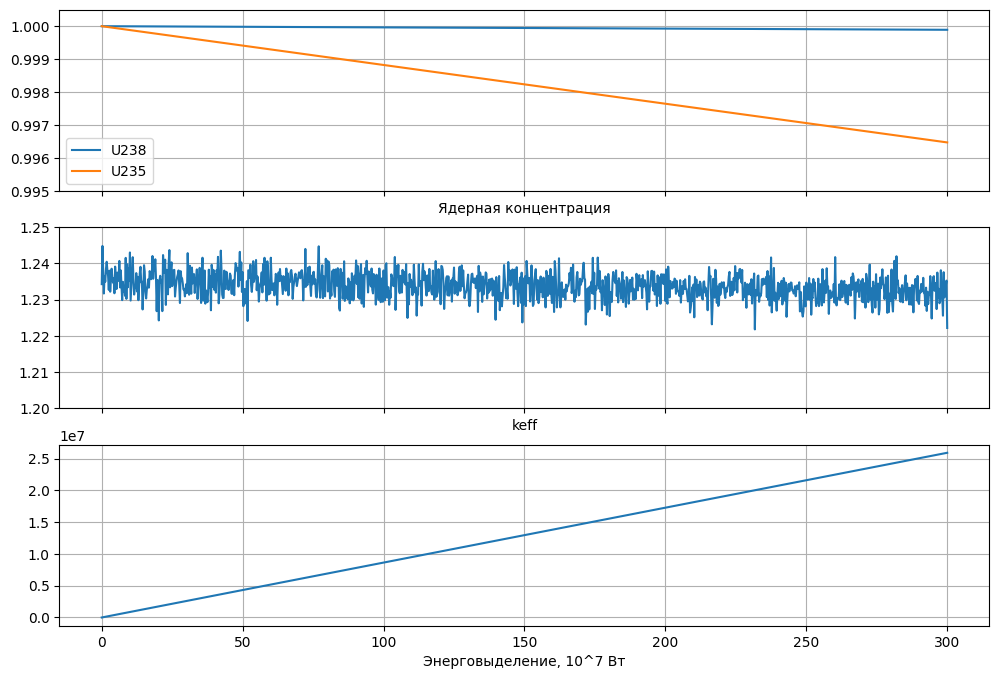

In [9]:
fig, ax = plt.subplots(ncols=1, nrows=3, sharex=True, sharey=False, figsize=(12,8))
ax[1].plot(
    times,
    keff,
    # marker='.',
    label='keff'
)
ax[1].set_ylim(1.2, 1.25)

ax[0].plot(
    times,
    atoms1,
    # marker='.',
    label='U238'
)
ax[0].plot(
    times,
    atoms2,
    # marker='.',
    label='U235'
)
ax[0].legend(loc='best')
ax[0].set_ylim(0.995,1.0005)
ax[2].plot(
    times,
    heat,
    # marker='.',
    label='heat'
)

ax[1].set_xlabel('keff')
ax[0].set_xlabel('Ядерная концентрация')
ax[2].set_xlabel('Энерговыделение, 10^7 Вт')
ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)

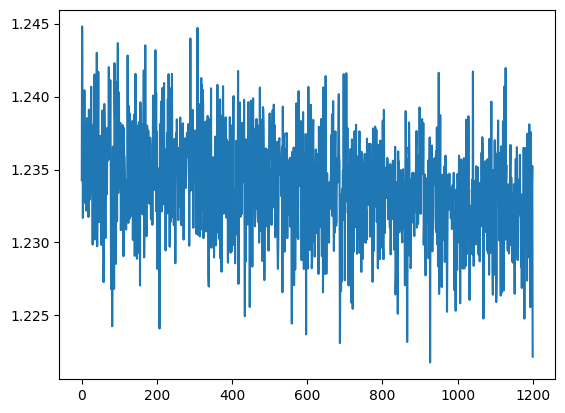

In [10]:
plt.plot(keff)

In [11]:
results.get_decay_heat('2')

(array([0.00000e+00, 2.16000e+04, 4.32000e+04, ..., 2.58768e+07,
        2.58984e+07, 2.59200e+07], shape=(1201,)),
 array([1.98968893e-04, 6.09102992e+01, 6.24011454e+01, ...,
        6.89480505e+01, 6.89684628e+01, 6.89422985e+01], shape=(1201,)))

In [32]:
results.get_atoms(mat='2', nuc='U235')[1], results.get_atoms(mat='2', nuc='U238')[1]

(array([4.02802205e+23, 4.02794025e+23, 4.02785882e+23, 4.02777778e+23,
        4.02769705e+23, 4.02761587e+23, 4.02753405e+23, 4.02745272e+23,
        4.02737126e+23, 4.02728966e+23, 4.02720871e+23, 4.02712627e+23,
        4.02704492e+23, 4.02696360e+23, 4.02688189e+23, 4.02680022e+23,
        4.02671896e+23, 4.02663686e+23, 4.02655552e+23, 4.02647515e+23,
        4.02639318e+23, 4.02631222e+23, 4.02623100e+23, 4.02614985e+23,
        4.02606807e+23, 4.02598671e+23, 4.02590530e+23, 4.02582416e+23,
        4.02574286e+23, 4.02566085e+23, 4.02557995e+23, 4.02549839e+23,
        4.02541766e+23, 4.02533669e+23, 4.02525506e+23, 4.02517296e+23,
        4.02509076e+23, 4.02500918e+23, 4.02492012e+23, 4.02482132e+23,
        4.02471343e+23, 4.02459370e+23, 4.02446339e+23, 4.02431793e+23,
        4.02415862e+23, 4.02398362e+23, 4.02379163e+23, 4.02357783e+23,
        4.02334810e+23, 4.02309397e+23, 4.02281299e+23, 4.02250639e+23,
        4.02216711e+23, 4.02178944e+23, 4.02137773e+23, 4.020927

In [33]:
f.keys()

<KeysViewHDF5 ['depletion time', 'eigenvalues', 'materials', 'nuclides', 'number', 'reaction rates', 'reactions', 'source_rate', 'time']>

In [34]:
for key,value in f.items():
    try:
        print(key, value.shape)
    except:
        print(key, value)

depletion time (116,)
eigenvalues (116, 1, 2)
materials <HDF5 group "/materials" (1 members)>
nuclides <HDF5 group "/nuclides" (3819 members)>
number (116, 1, 1, 3819)
reaction rates (116, 1, 1, 421, 7)
reactions <HDF5 group "/reactions" (7 members)>
source_rate (116, 1)
time (116, 2)


In [35]:
f['number']

<HDF5 dataset "number": shape (116, 1, 1, 3819), type "<f8">

/tmp/ipykernel_2685296/2693357386.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  plt.plot(np.array(f['eigenvalues']).reshape((-1,2))[:,0])


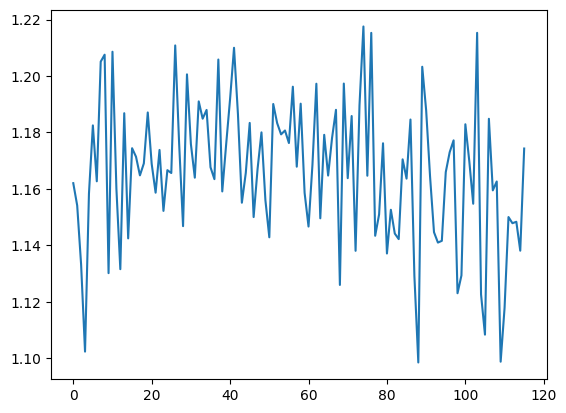

In [36]:
plt.plot(np.array(f['eigenvalues']).reshape((-1,2))[:,0])

In [37]:
for rname, rdata in f['reactions'].items():
    print(rname, rdata)

(n,2n) <HDF5 group "/reactions/(n,2n)" (0 members)>
(n,3n) <HDF5 group "/reactions/(n,3n)" (0 members)>
(n,4n) <HDF5 group "/reactions/(n,4n)" (0 members)>
(n,a) <HDF5 group "/reactions/(n,a)" (0 members)>
(n,gamma) <HDF5 group "/reactions/(n,gamma)" (0 members)>
(n,p) <HDF5 group "/reactions/(n,p)" (0 members)>
fission <HDF5 group "/reactions/fission" (0 members)>


In [38]:
f['reaction rates']

<HDF5 dataset "reaction rates": shape (116, 1, 1, 421, 7), type "<f8">

In [39]:
dir(f['nuclides'].items())

['__abstractmethods__',
 '__and__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__rsub__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_abc_impl',
 '_from_iterable',
 '_hash',
 '_mapping',
 'isdisjoint']

In [40]:
i = 0
for key,value in f['nuclides'].items():
    # if len(value)>0:
        print(key, value.keys())
        i+=1
    # if i>=5:
    #     break    

Ac206 <KeysViewHDF5 []>
Ac206_m1 <KeysViewHDF5 []>
Ac207 <KeysViewHDF5 []>
Ac208 <KeysViewHDF5 []>
Ac208_m1 <KeysViewHDF5 []>
Ac209 <KeysViewHDF5 []>
Ac210 <KeysViewHDF5 []>
Ac211 <KeysViewHDF5 []>
Ac212 <KeysViewHDF5 []>
Ac213 <KeysViewHDF5 []>
Ac214 <KeysViewHDF5 []>
Ac215 <KeysViewHDF5 []>
Ac216 <KeysViewHDF5 []>
Ac216_m1 <KeysViewHDF5 []>
Ac217 <KeysViewHDF5 []>
Ac218 <KeysViewHDF5 []>
Ac219 <KeysViewHDF5 []>
Ac220 <KeysViewHDF5 []>
Ac221 <KeysViewHDF5 []>
Ac222 <KeysViewHDF5 []>
Ac222_m1 <KeysViewHDF5 []>
Ac223 <KeysViewHDF5 []>
Ac224 <KeysViewHDF5 []>
Ac225 <KeysViewHDF5 []>
Ac226 <KeysViewHDF5 []>
Ac227 <KeysViewHDF5 []>
Ac228 <KeysViewHDF5 []>
Ac229 <KeysViewHDF5 []>
Ac230 <KeysViewHDF5 []>
Ac231 <KeysViewHDF5 []>
Ac232 <KeysViewHDF5 []>
Ac233 <KeysViewHDF5 []>
Ac234 <KeysViewHDF5 []>
Ac235 <KeysViewHDF5 []>
Ac236 <KeysViewHDF5 []>
Ag100 <KeysViewHDF5 []>
Ag100_m1 <KeysViewHDF5 []>
Ag101 <KeysViewHDF5 []>
Ag101_m1 <KeysViewHDF5 []>
Ag102 <KeysViewHDF5 []>
Ag102_m1 <KeysViewHDF5

In [41]:
dir(value)

['_MutableMapping__marker',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_d',
 '_e',
 '_gcpl_crt_order',
 '_id',
 '_ipython_key_completions_',
 '_lapl',
 '_lcpl',
 'attrs',
 'build_virtual_dataset',
 'clear',
 'copy',
 'create_dataset',
 'create_dataset_like',
 'create_group',
 'create_virtual_dataset',
 'file',
 'get',
 'id',
 'items',
 'keys',
 'move',
 'name',
 'parent',
 'pop',
 'popitem',
 'ref',
 'regionref',
 'requir